In [1]:
# import packages
import zarr
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.transform import from_origin

In [ ]:
# pull in data with the url for the zarr file
file_path = 'file_path'
z = zarr.open(file_path)


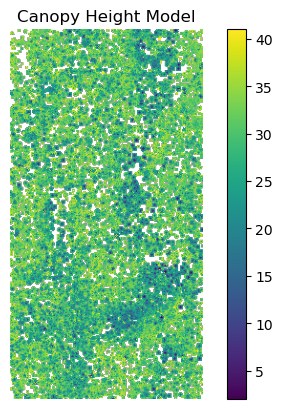

In [3]:
#plot a canopy height model based on the bulk density
data = z['canopy']['bulk_density'][1:,...]
reversed_voxels = data[::-1, :, :]
heightmap = np.argmax(reversed_voxels, axis=0)
chm_nan = np.where(heightmap == 0, np.nan, heightmap)

plt.title('Canopy Height Model')
plt.imshow(chm_nan, cmap='viridis', origin='lower')
plt.axis('off')
plt.colorbar()

In [4]:
profile = np.sum(data[1:], axis=(1, 2))
valid_indices = np.where(profile >= 0.1)[0]
z_levels = np.arange(1, profile.shape[0] + 1) 

Text(0, 0.5, 'Height (m)')

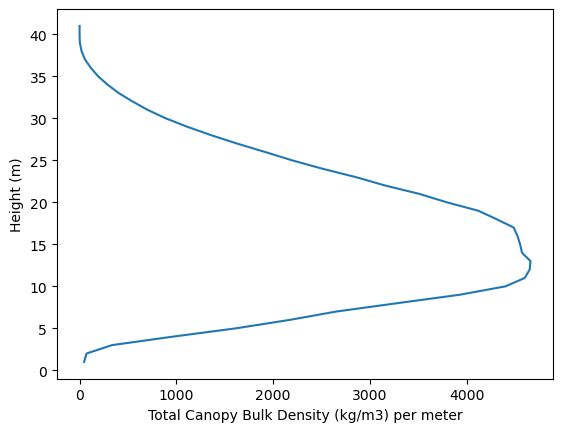

In [5]:
plt.plot(profile, z_levels)
plt.xlabel('Total Canopy Bulk Density (kg/m3) per meter')
plt.ylabel('Height (m)')